In [25]:
from qutip import *
from math import sqrt

from random import choices

ket0 = basis(2,0)
ket1 = basis(2,1)


P0 = 0.4 
P1 = 0.6

psi = sqrt(P0)*ket0 + sqrt(P1)*ket1


def measure_qubit(meas_basis, qubit):

    basis_vect0 = meas_basis[0].dag()
    basis_vect1 = meas_basis[1].dag()

    p0 = abs(basis_vect0 * qubit)**2
    p1 = abs(basis_vect1 * qubit)**2

    out = choices([meas_basis[0], meas_basis[1]], [p0, p1])

    return out



n_0, n_1 = 0,0
for _ in range(10000):
    out = measure_qubit(meas_basis=[ket0, ket1], qubit = psi)[0]
    
    if out == ket0:
        n_0 +=1
    else:
        n_1 +=1
    

print(n_0, n_1)

4016 5984


/opt/anaconda3/lib/python3.11/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


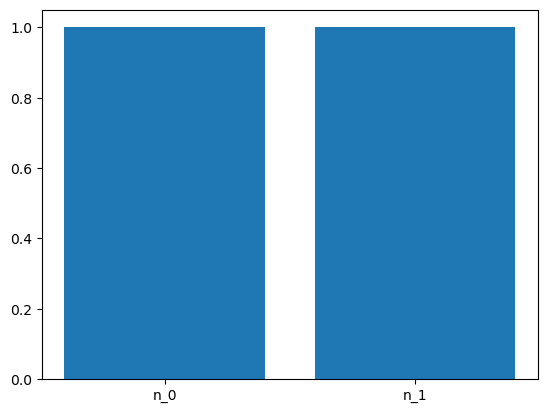

In [32]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from qutip import ket, basis
import numpy as np

# Assuming measure_qubit is already defined and psi, ket0, ket1 are initialized
n_0, n_1 = 1, 1
results = [n_0, n_1]

fig, ax = plt.subplots()
bars = ax.bar(['n_0', 'n_1'], results)

def update_histogram(frame):
    print('hi')
    out = measure_qubit(meas_basis=[ket0, ket1], qubit=psi)[0]
    
    if out == ket0:
        n_0 += 1
    else:
        n_1 += 1

    results[0] = n_0
    results[1] = n_1
    
    for bar, result in zip(bars, results):
        bar.set_height(result)
    
    ax.relim()
    ax.autoscale_view()

# Create animation
ani = FuncAnimation(fig, update_histogram, frames=np.arange(10000), repeat=False, interval=1)

plt.show()
